In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("Student Admission Data Report.xlsx")

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        250 non-null    object        
 1   Gender                      250 non-null    object        
 2   Extracurricular_Activities  232 non-null    object        
 3   GPA                         250 non-null    float64       
 4   SAT_Score                   250 non-null    int64         
 5   Program                     250 non-null    object        
 6   Admission_Status            250 non-null    object        
 7   Date                        250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 15.8+ KB


,GPA,SAT_Score,Date
count,250.000000,250.000000,250
mean,3.238320,1250.432000,2025-05-05 12:00:00
min,2.500000,900.000000,2025-01-01 00:00:00
25%,2.850000,1080.250000,2025-03-04 06:00:00
50%,3.230000,1237.000000,2025-05-05 12:00:00
75%,3.590000,1426.000000,2025-07-06 18:00:00
max,4.000000,1598.000000,2025-09-07 00:00:00
std,0.438607,204.733163,NaN


In [3]:
df.isnull().sum()


Name                           0
Gender                         0
Extracurricular_Activities    18
GPA                            0
SAT_Score                      0
Program                        0
Admission_Status               0
Date                           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

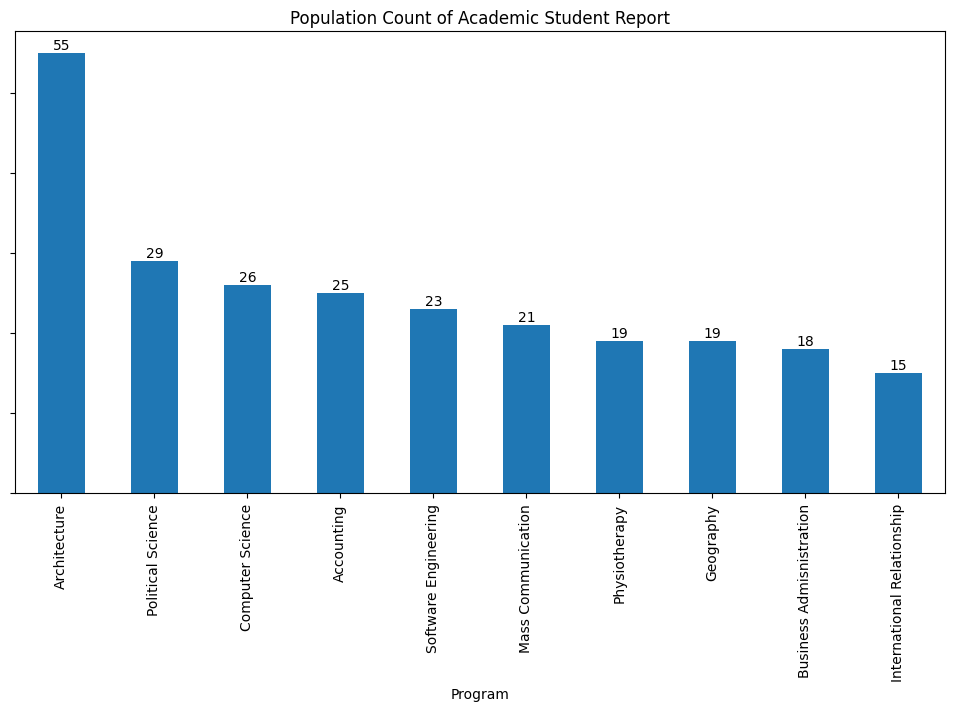

In [5]:
plt.figure(figsize=(12, 6))   
plt.title("Population Count of Academic Student Report")

ax = df['Program'].value_counts().plot(kind='bar')

for i, v in enumerate(df['Program'].value_counts()):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

ax.set_yticklabels([])

plt.show()

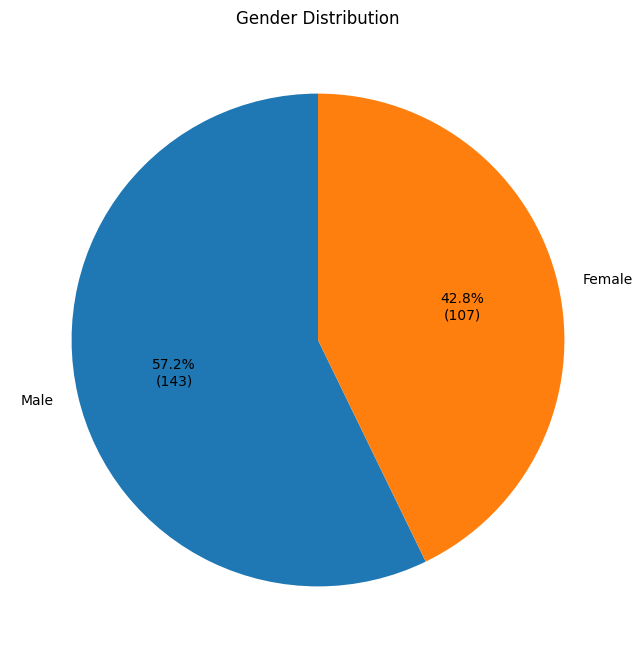

In [6]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(
    counts,
    labels=counts.index,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * counts.sum())})",
    startangle=90
)

plt.title("Gender Distribution")
plt.ylabel("")  

plt.show()

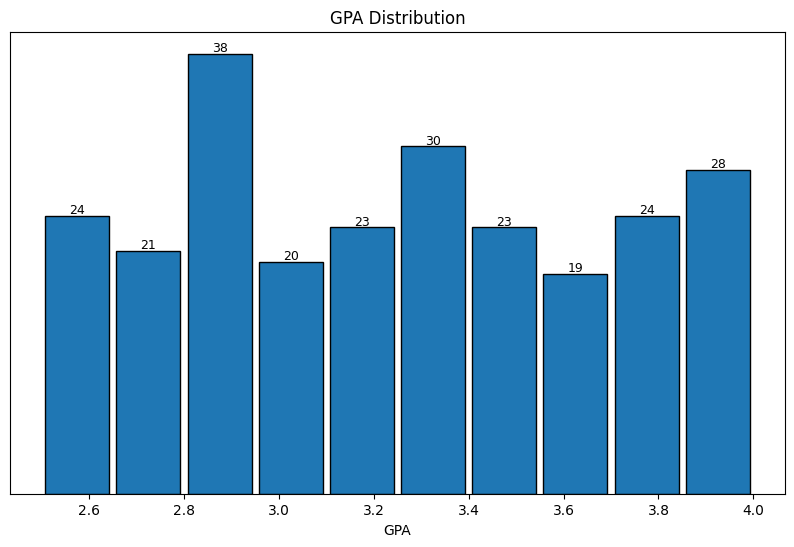

In [7]:
plt.figure(figsize=(10, 6))

counts, bins, patches = plt.hist(
    df['GPA'],
    bins=10,
    edgecolor='black',
    rwidth=0.9      
)

for count, x in zip(counts, bins):
    if count > 0:  
        plt.text(
            x + (bins[1] - bins[0]) / 2,
            count + 0.2,
            str(int(count)),
            ha='center',
            fontsize=9
        )

plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("")
plt.yticks([])

plt.show()

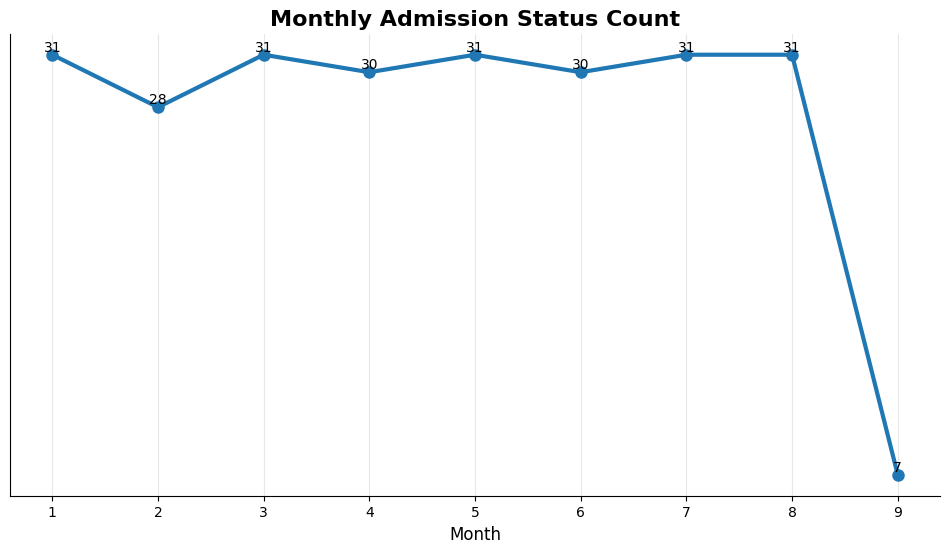

In [8]:
monthly_counts = df.groupby(df['Date'].dt.month)['Admission_Status'].count()

plt.figure(figsize=(12, 6))

# Modern line plot
plt.plot(
    monthly_counts.index,
    monthly_counts.values,
    linewidth=3,
    marker='o',
    markersize=8
)

# Add data labels above each point
for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y + 0.2, str(y), ha='center', fontsize=10)

# Modern style grid
plt.grid(alpha=0.3)

# Title and x-axis label
plt.title("Monthly Admission Status Count", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("")  
plt.yticks([])

# Remove top & right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [ ]:
program_applicants_count = df.groupby('Program')['Name'].nunique().reset_index(name = 'Applicants_Count')
program_applicants_count = program_applicants_count.sort_values('Applicants_Count', ascending = False)

top_n = 5
top_program = program_applicants_count.head(10)
plt.figure(figsize = (12,6))
ax3 = sns.barplot(data = top_program, x='Program', y='Applicants_Count', palette = 'Blues_d')

for p in ax3.patches:
    height = p.get_height()
ax3.text(p.get_x() + p.get_width() / 2, height + 1, f'{int(height)}', ha = 'center', va = 'bottom', fontsize = 12)

plt.title("Top 1o Program With Highest Number Of Applicants", fontsize = 14)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
